In [ ]:
%load_ext autoreload
%autoreload 2


In [68]:
from pathlib import Path
import os 
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from typing import List

from utils.plot_utils import process_and_plot_results

# define root directory
ROOT_DIR = Path().resolve().parent

In [ ]:
data_path = ROOT_DIR / Path('data')
model_modifications = ['sac_default', 'sac_ere']
metrics = ['mean_reward', 'win_rate'] # Corresponds to mean cumulative reward and win rate over n=10 episodes training against weak opponent

In [ ]:
model_modification_data = {} # {model_modification: {metric: [data for each run]}}

for model_modification in model_modifications:
    model_data_path = data_path / model_modification
    if not model_data_path.exists():
        print('Data for model {} does not exist'.format(model_modification))
        continue
    model_modification_data[model_modification] = {}
    for metric in metrics:
        metric_data = []
        metric_path = model_data_path / metric
        if not metric_path.exists():
            print('Data for metric {} does not exist'.format(metric))
            continue
        for run in os.listdir(metric_path):
            run_path = metric_path / run
            # metric_file = run_path / (metric + '.csv')
            metric_data.append(pd.read_csv(run_path))
        model_modification_data[model_modification][metric] = metric_data

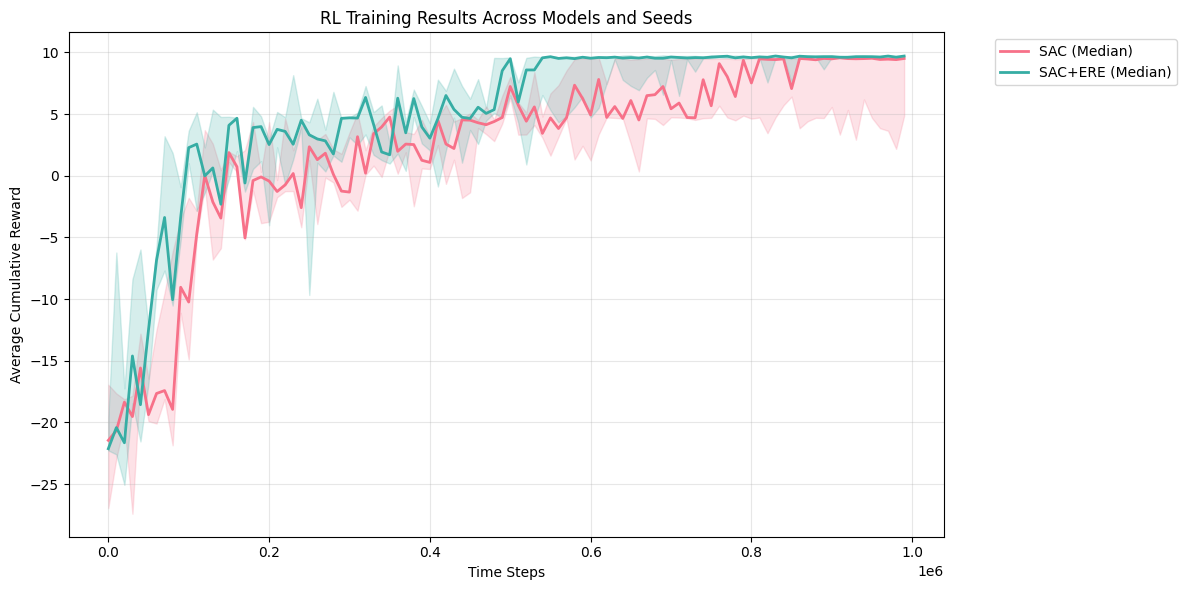

In [69]:
dfs = {'SAC': model_modification_data['sac_default']['mean_reward'],
       'SAC+ERE': model_modification_data['sac_ere']['mean_reward']}
fig = process_and_plot_results(dfs, window_size=10000, yaxis_label='Average Cumulative Reward')
plt.show()

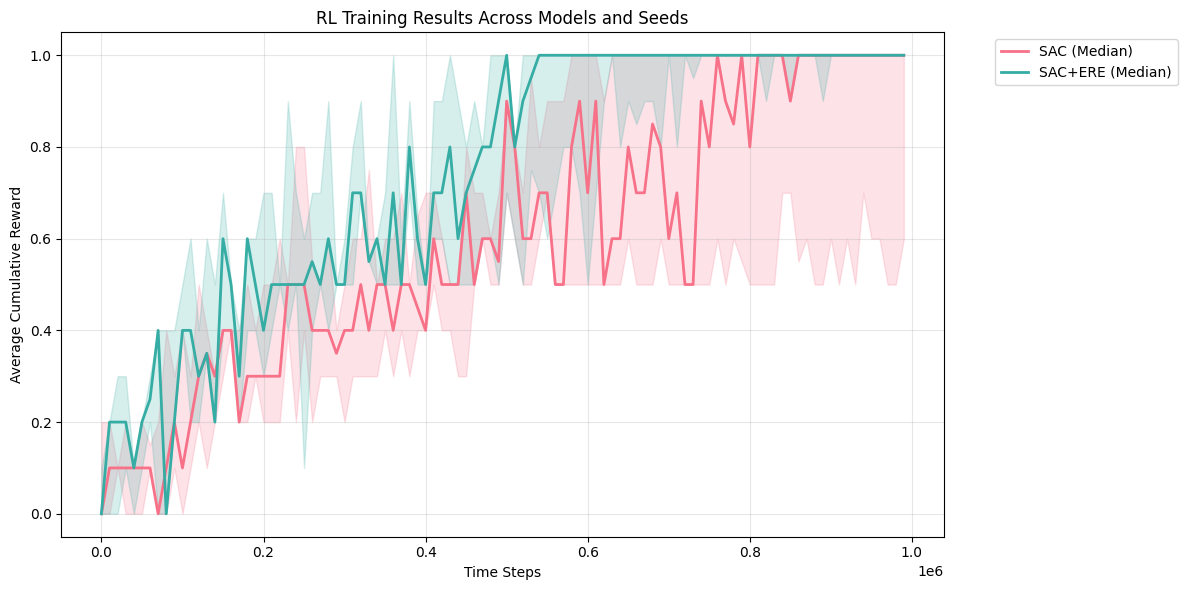

In [67]:
dfs = {'SAC': model_modification_data['sac_default']['win_rate'],
       'SAC+ERE': model_modification_data['sac_ere']['win_rate']}
fig = process_and_plot_results(dfs, window_size=10000, yaxis_label='Average Cumulative Reward')
plt.show()